In [208]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [209]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data= pd.read_csv(ride_data_to_load)

In [210]:
# Combine the data into a single dataset

data = pd.merge( ride_data, city_data,how = "left", on = "city")
data_1 = data.set_index("city")
data_1
data_urban = data.loc[data["type"] == "Urban"]
data_suburban=data.loc[data["type"] == "Suburban"]
data_rural =data.loc[data["type"] == "Rural"]


In [347]:
# Display the data table for preview
data.head

<bound method NDFrame.head of                      city                 date   fare        ride_id  \
0      Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1      South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2      Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3              Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4              South Jack  2018-03-06 04:28:35  34.58  3908451377344   
5            South Latoya  2018-03-11 12:26:48   9.52  1994999424437   
6           New Paulville  2018-02-27 11:17:56  43.25   793208410091   
7            Simpsonburgh  2018-04-26 00:43:24  35.98   111953927754   
8         South Karenland  2018-01-08 03:28:48  35.09  7995623208694   
9           North Jasmine  2018-03-09 06:26:29  42.81  5327642267789   
10    New Kimberlyborough  2018-02-07 01:10:11   9.34  7992781920789   
11            West Angela  2018-01-12 01:45:27  26.86  4820052223501   
12             Rodneyfort  2018-03

## Bubble Plot of Ride Sharing Data

In [212]:
# Obtain the x and y coordinates for each of the three city types
#   1. Average Fare ($) Per City
percity_count = data["city"].value_counts()
percity_count_urban = data_urban["city"].value_counts()
percity_count_suburban = data_suburban["city"].value_counts()
percity_count_rural = data_rural["city"].value_counts()

fare_sum = data.groupby(by="city").sum()["fare"]
fare_sum_urban = data_urban.groupby(by="city").sum()["fare"]
fare_sum_suburban = data_suburban.groupby(by="city").sum()["fare"]
fare_sum_rural = data_rural.groupby(by="city").sum()["fare"]

avg_fare = fare_sum/percity_count
avg_fare_urban = fare_sum_urban/percity_count_urban
avg_fare_suburban = fare_sum_suburban/percity_count_suburban
avg_fare_rural = fare_sum_rural/percity_count_rural


In [213]:
#  2. Total Number of Rides Per City
ridecount_percity_urban = data_urban.groupby(by="city").count()["ride_id"]
ridecount_percity_suburban=data_suburban.groupby(by="city").count()["ride_id"]
ridecount_percity_rural =data_rural.groupby(by="city").count()["ride_id"]
ridecount_percity=data_1.groupby(by="city").count()["ride_id"]

# 3. Total Number of Drivers Per City
drivercount_percity_urban = data_urban["driver_count"]
drivercount_percity_suburban = data_suburban["driver_count"]
drivercount_percity_rural  =data_rural["driver_count"]
drivercount_percity  =data_1["driver_count"]


In [214]:
# 4. x and y coordinates for each of the three city types
#    4.1 x for total number of rides per city
max_num_rides_urban = ridecount_percity_urban.max()
min_num_rides_urban = ridecount_percity_urban.min()
max_num_rides_suburban = ridecount_percity_suburban.max()
min_num_rides_suburban = ridecount_percity_suburban.min()
max_num_rides_rural = ridecount_percity_rural.max()
min_num_rides_rural = ridecount_percity_rural.min()
df_xlimit = pd.DataFrame ([["max_num_rides_urban",max_num_rides_urban],
                             ["max_num_rides_suburban",max_num_rides_suburban],["max_num_rides_rural", max_num_rides_rural],
                             ["min_num_rides_urban",min_num_rides_urban], ["min_num_rides_suburban",min_num_rides_suburban], 
                             ["min_num_rides_rural",min_num_rides_rural]], columns=['item','count'])
print (df_xlimit)


                     item  count
0     max_num_rides_urban     39
1  max_num_rides_suburban     27
2     max_num_rides_rural     12
3     min_num_rides_urban     12
4  min_num_rides_suburban      9
5     min_num_rides_rural      3


In [310]:
#    4.2 y for average fare$
max_avg_fare_urban = avg_fare_urban.max()
min_avg_fare_urban = avg_fare_urban.min()
max_avg_fare_suburban = avg_fare_suburban.max()
min_avg_fare_suburban = avg_fare_suburban.min()
max_avg_fare_rural = avg_fare_rural.max()
min_avg_fare_rural = avg_fare_rural.min()

df_ylimit = pd.DataFrame ([["max_avg_fare_urban",max_avg_fare_urban],
                             ["max_avg_fare_suburban",max_avg_fare_suburban],["max_avg_fare_rural", max_avg_fare_rural],
                             ["min_avg_fare_urban",min_avg_fare_urban], ["min_avg_fare_suburban",min_avg_fare_suburban], 
                             ["min_avg_fare_rural",min_avg_fare_rural]], columns=['item','count'])
print (df_ylimit)

                    item      count
0     max_avg_fare_urban  28.993750
1  max_avg_fare_suburban  36.422500
2     max_avg_fare_rural  43.278333
3     min_avg_fare_urban  20.093158
4  min_avg_fare_suburban  24.704286
5     min_avg_fare_rural  24.123333


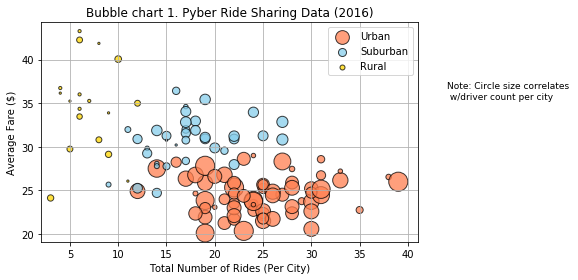

In [378]:
## Build the scatter plots for each city types
urbanscatter =plt.scatter(ridecount_percity_urban, avg_fare_urban, marker="o", facecolors="coral", edgecolors="black",
            s=drivercount_percity_urban*5, alpha=0.75)
suburbanscatter=plt.scatter(ridecount_percity_suburban, avg_fare_suburban, marker="o", facecolors="SkyBlue", edgecolors="black",
            s=drivercount_percity_suburban*5, alpha=0.75)
ruralscatter=plt.scatter(ridecount_percity_rural, avg_fare_rural, marker="o", facecolors="gold", edgecolors="black",
            s=drivercount_percity_rural*5, alpha=0.75)

# Incorporate the other graph properties

plt.ylim(min_avg_fare_urban-1 , max_avg_fare_rural+1)
plt.xlim(min_num_rides_rural-1 ,max_num_rides+2)

plt.title("Bubble chart 1. Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.tight_layout()

# Create a legend
plt.legend((urbanscatter, suburbanscatter,ruralscatter), ('Urban',  'Suburban','Rural'))

# Incorporate a text label regarding circle size
plt.text(44, 35.5, "Note: Circle size correlates \n w/driver count per city", fontsize=9)

# Save Figure
plt.savefig('PyberRideSharingDataBubble', bbox_inches = 'tight', pad_inches = 2)

# Show plot
plt.show()

## Total Fares by City Type

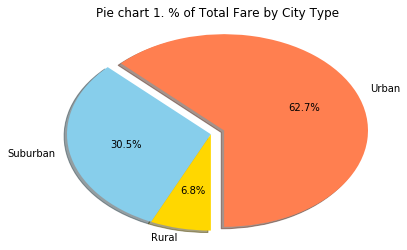

In [379]:
# Calculate Type Percents

fare_sum_urban = data_urban.groupby(by="city").sum()["fare"]
fare_sum_suburban = data_suburban.groupby(by="city").sum()["fare"]
fare_sum_rural = data_rural.groupby(by="city").sum()["fare"]

percentage_fare_urban = fare_sum_urban.sum()*100/fare_sum.sum() 
percentage_fare_suburban = fare_sum_suburban.sum()*100/fare_sum.sum() 
percentage_fare_rural = fare_sum_rural.sum()*100/fare_sum.sum()  

# Build Pie Chart

#1. Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
percent = [percentage_fare_urban, percentage_fare_suburban, percentage_fare_rural]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title('Pie chart 1. % of Total Fare by City Type')
plt.axis("tight")

# Save Figure
plt.savefig("Total Fares by City Type.png")
# Show Figure
plt.show()

In [313]:
fare_sum_urban.sum()

39854.38000000001

## Total Rides by City Type

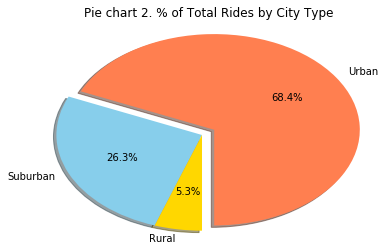

In [383]:
# Calculate Ride Percents

percentage_ridecount_urban= ridecount_percity_urban.sum()*100/ridecount_percity_urban.sum()
percentage_ridecount_suburban=ridecount_percity_suburban.sum()*100/ridecount_percity_urban.sum()
percentage_ridecount_rural=ridecount_percity_rural.sum()*100/ridecount_percity_urban.sum()

# Build Pie Chart

#1. Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
percent = [percentage_ridecount_urban, percentage_ridecount_suburban, percentage_ridecount_rural]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title('Pie chart 2. % of Total Rides by City Type')
plt.axis("tight")

# Save Figure
plt.savefig("Total rides by City Type.png")
# Show Figure
plt.show()

## Total Drivers by City Type

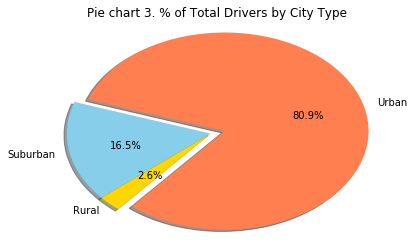

In [382]:
# Calculate Drivers Percents

driver_sum = city_data["driver_count"].sum()
driver_sum_urban = city_data["driver_count"].loc[city_data["type"] == "Urban"].sum() 
driver_sum_suburban = city_data["driver_count"].loc[city_data["type"] == "Suburban"].sum() 
driver_sum_rural = city_data["driver_count"].loc[city_data["type"] == "Rural"].sum() 
driver_sum_suburban
percentage_driver_urban = driver_sum_urban.sum()*100/driver_sum.sum() 
percentage_driver_suburban = driver_sum_suburban.sum()*100/driver_sum.sum() 
percentage_driver_rural = driver_sum_rural.sum()*100/driver_sum 

#Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
percent = [percentage_driver_urban.sum(),percentage_driver_suburban.sum(),percentage_driver_rural.sum()]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=230)
plt.title('Pie chart 3. % of Total Drivers by City Type')
plt.axis("tight")

# Save Figure
plt.savefig("Total drivers by City Type.png")
# Show Figure
plt.show()